# Computer Vision: Assignment 3 

GROUP 11 

Q. Capture Image of chess board(in Black&amp;white) with your mobile camera. The captured image
needs to be converted to gray scale and then to black and white. Write a python script to find all the corner points in the binary chess board image, and
display coordinates at each corner, superimposing the coordinates with the binary image.

In [ ]:
import argparse
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

In [ ]:
def find_corners(input_img, window_size, threshold):  
    corner_list = []
    output_img = cv2.cvtColor(input_img.copy(), cv2.COLOR_GRAY2RGB)
    offset = int(window_size/2)
    y_range = input_img.shape[0] - offset
    x_range = input_img.shape[1] - offset    
    dy, dx = np.gradient(input_img)
    Ixx = dx**2
    Iyy = dy**2   
    for y in range(offset, y_range):
        for x in range(offset, x_range):
            start_y = y - offset
            end_y = y + offset + 1
            start_x = x - offset
            end_x = x + offset + 1
            windowIxx = Ixx[start_y : end_y, start_x : end_x]
            windowIyy = Iyy[start_y : end_y, start_x : end_x]
            Sxx = windowIxx.sum()
            Syy = windowIyy.sum()
            r = min(Sxx,Syy)
            if r > threshold:
                corner_list.append([x, y, r])
                output_img[y,x] = (0,0,255)
    
    return corner_list, output_img

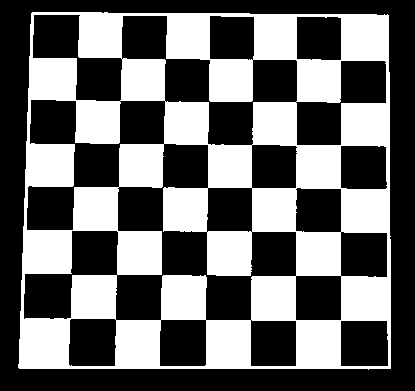

In [ ]:
img=cv2.imread('1.png',0)
ret,binary=cv2.threshold(img,127,255,cv2.THRESH_BINARY)# src,thres value,max pixel value,type of thres
cv2_imshow(binary)

In [ ]:
window_size = 5
threshold = 10000.00

In [ ]:
blur = cv2.GaussianBlur(binary,(5,5),0)
median = cv2.medianBlur(blur, 9)
corner_list, corner_img = find_corners(median, 7, 10000)

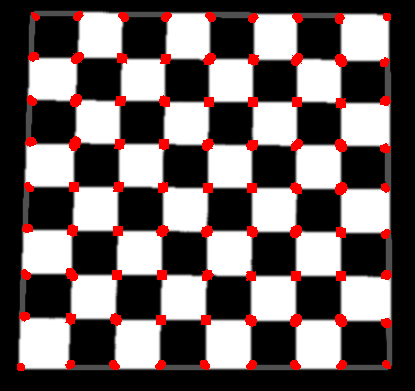

In [ ]:
cv2_imshow(corner_img)

Using Inbuilt Function:  

In [ ]:
def Arrange(x,y,l):
  for i in range(l):
    for j in range(i+1,l):    
        if(x[i] > x[j]):    
            temp = x[i];    
            x[i] = x[j];    
            x[j] = temp;
            temp = y[i];    
            y[i] = y[j];    
            y[j] = temp;

  return x , y  

4 7
3 7
8 6
6 6
2 6
8 5
5 4
4 4
3 3
9 0
6 3
2 7
5 7
5 5
4 5
2 4
5 3
3 2
5 1
6 4
3 5
1 5
0 7
0 3
1 0
4 6
8 7
6 7
1 7
1 6
6 5
8 4
8 3
4 3
1 3
1 2
8 1
4 1
9 8
8 8
6 8
5 8
3 8
2 8
9 7
9 6
0 6
9 5
0 5
9 2
0 2
0 1
8 0
6 0
5 0
4 0
3 0
2 0
0 0
5 6
3 6
2 5
1 4
2 3
8 2
5 2
4 2
6 1
3 1
1 1
2 2
3 4
9 4
6 2
2 1
1 8
9 1
9 3
0 8
4 8
0 4


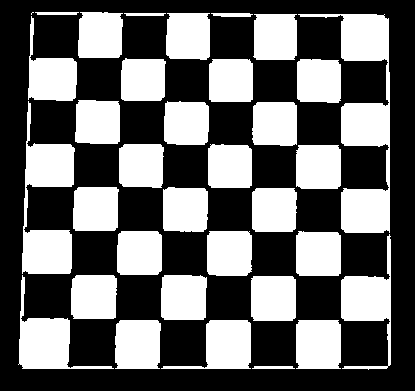

In [ ]:
img=cv2.imread('1.png',0)

corners = cv2.goodFeaturesToTrack(binary,81,0.01,10)
corners = np.int0(corners)
X_arr = np.array([[]])
Y_arr = np.array([[]])
for i in corners:
  x,y = i.ravel()
  cx,cy = (x-19)//40 , (y-15)//40
  print(cx,cy)
  cv2.circle(img,(x,y),3,0,-1)
  X_arr = np.append(X_arr,x)
  Y_arr = np.append(Y_arr,y)
X = np.array([[]])
Y = np.array([[]])
X_arr2 , Y_arr2 = Arrange(X_arr,Y_arr,len(X_arr))
for i in range(9):
  Y_arr3 , X_arr3 = Arrange( Y_arr2[i*9:(i+1)*9],X_arr2[i*9:(i+1)*9], 9)
  X = np.append(X,X_arr3)
  Y = np.append(Y,Y_arr3)
corner = np.array([X,Y])
corner = np.transpose(corner)
cv2_imshow(img)

In [ ]:
output_img = cv2.cvtColor(img.copy(), cv2.COLOR_GRAY2RGB)
for i in range(9):
  for j in range(9):
    x,y = corner[i*9+j]
    text = "("+str(i)+","+str(j)+")"
    cv2.putText(output_img,text,(int(x),int(y)),cv2.FONT_HERSHEY_COMPLEX,0.4,(0,240,240),1)
cv2.imwrite('output.png', output_img)

True

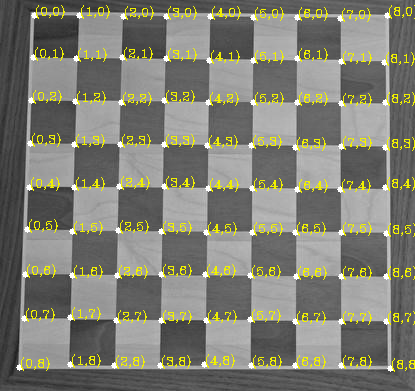

In [ ]:
cv2_imshow(output_img)

In [ ]:
CHECKERBOARD = (6,9)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)